---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# **SEM-EX CORRELATION ANALYSIS**

### Import Libraries

In [199]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
import matplotlib.pyplot as plt

### Dataset Import




In [200]:
Clinical_Claro_features = pd.read_excel(r'C:\Users\Ruffi\Desktop\Deep_clustering_SEM-EX\src\models\Clustering_Correlation_Analysis\data\RETRO_PR_Dataset_Clinical.xlsx', index_col=1).drop(columns=['Unnamed: 0'])
display(Clinical_Claro_features)

,Sesso,Stadio,Stato,Trattamento,Diagnosi,cT,cN,Età,cM,CT_concomitante,Chirurgia,label OS
ID paziente,,,,,,,,,,,,
9309,f,iiia,doc,radio,carcinoma squamoso,2.0,2.0,86,0,1,0,0
40158,m,iiia,dod,radio,carcinoma squamoso,3.0,2.0,72,0,0,0,0
51236,f,iiia,awd,radio,adenocarcinoma,NaN,2.0,58,0,0,0,1
52384,m,iiib,ned,radio,carcinoma squamoso,4.0,1.0,73,0,1,0,1
58391,m,iiib,awd,radio,carcinoma squamoso,3.0,2.0,75,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
100151470,m,iiib,dod,altro,adenocarcinoma,3.0,3.0,77,0,1,0,0
100189360,m,iiib,doc,radio,carcinoma squamoso,4.0,2.0,63,0,1,0,0
100237360,f,iiia,awd,radio,carcinoma squamoso,2.0,2.0,70,0,0,0,1


## Exploring some statistics related to Data
In this block cell we examinate the statistics underlying each features inside the clinical featurs distribution.

In [201]:
Clinical_Claro_features.describe()

,cT,cN,Età,cM,CT_concomitante,Chirurgia,label OS
count,151.000000,161.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,2.947020,1.720497,68.641711,0.133690,0.508021,0.197861,0.614973
std,0.914972,0.776299,10.274458,0.341232,0.501278,0.399456,0.487908
min,0.000000,0.000000,38.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,62.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2.000000,70.000000,0.000000,1.000000,0.000000,1.000000
75%,4.000000,2.000000,77.000000,0.000000,1.000000,0.000000,1.000000
max,4.000000,3.000000,92.000000,1.000000,1.000000,1.000000,1.000000


# 1) BASELINE: Clinical features alone
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### Features and Targets and Convert Data to Arrays
we need to separate the data into the features and targets. The target, also known as the label, is the value we want to predict,
 in this case the actual max temperature and the features are all the columns the model uses to make a prediction.
 We will also convert the Pandas dataframes to Numpy arrays because that is the way the algorithm works. (I save the column headers, which are the names of the features, to a list to use for later visualization).

### Labels Encoder
Specifically, the LabelEncoder of creating an integer encoding of labels.


In [202]:


# Labels are the values we want to predict
Y = Clinical_Claro_features.pop('label OS').astype(int)
# Remove the labels from the features
# axis 1 refers to the columns



# Features for training
X= Clinical_Claro_features.copy(deep=True)
X['cT'] = pd.to_numeric( X['cT']).fillna(-99)
X['cN'] = pd.to_numeric( X['cN']).fillna(-99)
display(X)

,Sesso,Stadio,Stato,Trattamento,Diagnosi,cT,cN,Età,cM,CT_concomitante,Chirurgia
ID paziente,,,,,,,,,,,
9309,f,iiia,doc,radio,carcinoma squamoso,2.0,2.0,86,0,1,0
40158,m,iiia,dod,radio,carcinoma squamoso,3.0,2.0,72,0,0,0
51236,f,iiia,awd,radio,adenocarcinoma,-99.0,2.0,58,0,0,0
52384,m,iiib,ned,radio,carcinoma squamoso,4.0,1.0,73,0,1,0
58391,m,iiib,awd,radio,carcinoma squamoso,3.0,2.0,75,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
100151470,m,iiib,dod,altro,adenocarcinoma,3.0,3.0,77,0,1,0
100189360,m,iiib,doc,radio,carcinoma squamoso,4.0,2.0,63,0,1,0
100237360,f,iiia,awd,radio,carcinoma squamoso,2.0,2.0,70,0,0,0



# 1) Training and Testing Sets:
During training, we let the model ‘see’ the answers, in this case the actual temperature, so it can learn how to predict the temperature from the features. We expect there to be some relationship between all the features and the target value, and the model’s job is to learn this relationship during training. Then, when it comes time to evaluate the model, we ask it to make predictions on a testing set where it only has access to the features (not the answers)! Because we do have the actual answers for the test set, we can compare these predictions to the true value to judge how accurate the model is. Generally, when training a model, we randomly split the data into training and testing sets to get a representation of all data points.
 I am setting the random state to 42 which means the results will be the same each time I run the split for reproducible results.
### Hold-out
Hold-out is when you split up your dataset into a ‘train’ and ‘test’ set. The training set is what the model is trained on, and the test set is used to see how well that model performs on unseen data. A common split when using the hold-out method is using 80% of data for training and the remaining 20% of the data for testing


In [203]:

# Using Skicit-learn to split data into training and testing sets
# Split the data into training and testing sets:
# Split Proportion: 80% Training / 20% Test
random_state = 42
X_train, X_test, train_labels, test_labels = train_test_split(X, Y, test_size = 0.20, random_state = 1, stratify=Y)
X_train = X_train.fillna('na')
X_test = X_test.fillna('na')

# Printing of dataset type for each feature in the dataset:
print(X_train.dtypes)



Sesso               object
Stadio              object
Stato               object
Trattamento         object
Diagnosi            object
cT                 float64
cN                 float64
Età                  int64
cM                   int64
CT_concomitante      int64
Chirurgia            int64
dtype: object


### Create a constructor to handle categorical features for us
This is my favorite step because by recreating this new constructor, I do not need to do any transformation for any X dataframe when passing into the model. This constructor will automatically handle the categorical variables and leave numeric variables untouched. How convenient!!!

In [204]:



# Once done tha t we have to select features that have to be transformed:
features_to_encode = list(X.select_dtypes(include = ['object']).columns)


# Pass these features inside the constructor:
col_trans = make_column_transformer(
                        (OneHotEncoder(),features_to_encode),
                        remainder = "passthrough"
                        )


In this block code we print shapes of data



In [205]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', test_labels.shape)

print(X_train.dtypes)




Training Features Shape: (149, 11)
Training Labels Shape: (149,)
Testing Features Shape: (38, 11)
Testing Labels Shape: (38,)
Sesso               object
Stadio              object
Stato               object
Trattamento         object
Diagnosi            object
cT                 float64
cN                 float64
Età                  int64
cM                   int64
CT_concomitante      int64
Chirurgia            int64
dtype: object


### 2) Train Model
After all the work of data preparation, creating and training the model is pretty simple using Scikit-learn. We import the random forest regression model from skicit-learn, instantiate the model, and fit (scikit-learn’s name for training) the model on the training data. (Again setting the random state for reproducible results). This entire process is only 3 lines in scikit-learn!
# Instantiate the model to train: RF Classifier

In [206]:

# Instantiate model with 1000 decision trees
rf_classifier = RandomForestClassifier(
                      min_samples_leaf=25,
                      min_samples_split=2,
                      n_estimators=1000,
                      bootstrap=True,
                      oob_score=True,
                      n_jobs=-1,
                      random_state=42,
                      max_features='auto',
                      criterion='gini')


In [207]:

# Creation of the pipeline
pipe = make_pipeline(col_trans, rf_classifier)
pipe.fit(X_train, train_labels)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Sesso', 'Stadio', 'Stato',
                                                   'Trattamento',
                                                   'Diagnosi'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(min_samples_leaf=25, n_estimators=1000,
                                        n_jobs=-1, oob_score=True,
                                        random_state=42))])

### 3) Make Predictions on the Test Set
Our model has now been trained to learn the relationships between the features and the targets. The next step is figuring out how good the model is! To do this we make predictions on the test features (the model is never allowed to see the test answers). We then compare the predictions to the known answers. When performing regression, we need to make sure to use the absolute error because we expect some of our answers to be low and some to be high. We are interested in how far away our average prediction is from the actual value so we take the absolute value (as we also did when establishing the baseline).

Making predictions with out model is another 1-line command in Skicit-learn.


In [208]:
# Use the forest's predict method on the test data
y_predictions = pipe.predict(X_test)


### 4) Evaluate the classifier







#### ACCURACY:
We compute the number of samples correclty predicted in the test set.


In [209]:
accuracy_score(test_labels, y_predictions)
print(f"The accuracy of the model is {round(accuracy_score(test_labels,y_predictions),3)*100} %")

The accuracy of the model is 89.5 %


#### AUC/ ROC CURVE:
[:,1] gives the predicted probability distribution of class label 1 from the dataframe. This is important to calculate ROC_AUC score. You may ask why class label 1 and not 0. Here is what I got from sklearn document:
" For y_score, ‘The binary case … the scores must be the scores of the class with the greater label’. That is why we need to get label 1 instead of label 0. ".
At the end, we compute the plot for the ROC Curve.

In [210]:

train_probs = pipe.predict_proba(X_train)[:,1]
probs = pipe.predict_proba(X_test)[:,1]
train_predictions = pipe.predict(X_train)


# ROC AUC
print(f'Train ROC AUC Score: {roc_auc_score(train_labels, train_probs, multi_class="ovr",average="macro")}')
print(f'Test ROC AUC  Score: {roc_auc_score(test_labels, probs , multi_class="ovr",average="macro")}')
y_test = test_labels
y_train = train_labels

Train ROC AUC Score: 0.9848398169336383
Test ROC AUC  Score: 0.9623188405797102


Recall Baseline: 1.0 Test: 1.0 Train: 0.86
Precision Baseline: 0.61 Test: 0.85 Train: 0.93
Roc Baseline: 0.5 Test: 0.96 Train: 0.98


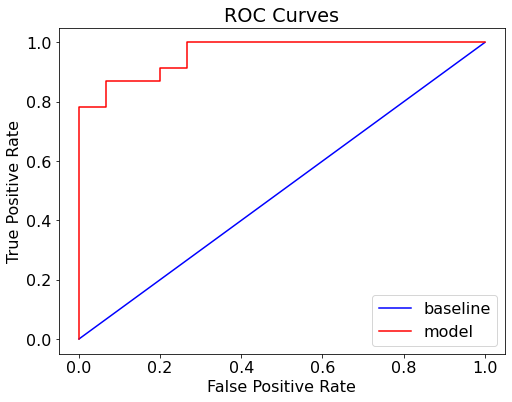

In [211]:



def evaluate_model(y_pred, probs,train_predictions, train_probs):
    baseline = {}
    baseline['recall']=recall_score(y_test,
                    [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test,
                    [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    results = {}
    results['recall'] = recall_score(y_test, y_pred)
    results['precision'] = precision_score(y_test, y_pred)
    results['roc'] = roc_auc_score(y_test, probs)
    train_results = {}
    train_results['recall'] = recall_score(y_train,       train_predictions, average='macro')
    train_results['precision'] = precision_score(y_train, train_predictions, average='macro')
    train_results['roc'] = roc_auc_score(y_train, train_probs,average='macro', multi_class="ovr")
    for metric in ['recall', 'precision', 'roc']:
          print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
     # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)
    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate');
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    plt.show()


evaluate_model(y_predictions,probs,train_predictions,train_probs)


#### Confusion matrix
One can just simply type confusion_matrix(y_test, y_pred) to get the confusion matrix. However, let’s take a more advanced approach. Here, I create a function to plot confusion matrix, which prints and plots the confusion matrix.


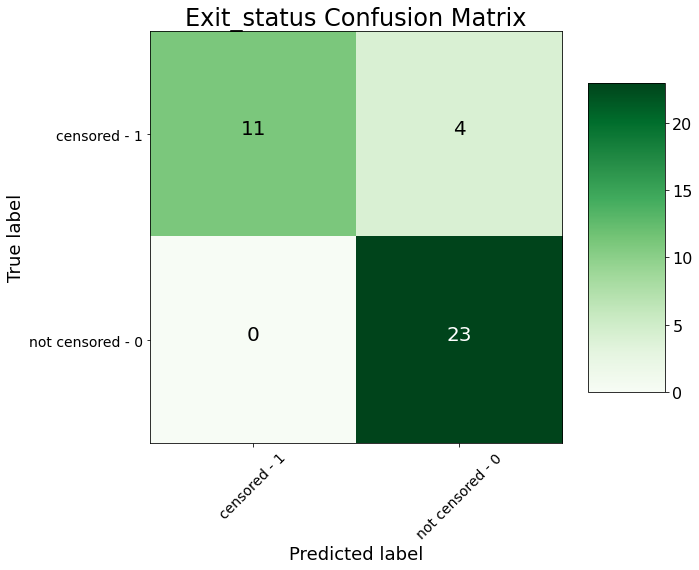

In [212]:
import itertools
def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens): # can change color
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        plt.grid(None)
        plt.tight_layout()
        plt.ylabel('True label', size = 18)
        plt.xlabel('Predicted label', size = 18)

# Let's plot it out
cm = confusion_matrix(y_test, y_predictions)
plot_confusion_matrix(cm, classes = ['censored - 1', 'not censored - 0'],
                      title = 'Censored Status Confusion Matrix')